In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

/Users/cameronbailey/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
genre_df = pd.read_csv('genre_df_cleaned.csv',index_col=0)

# Descriptive Statistics

In [3]:
genre_df.head()

,genre,sentiment score,sentiment,year,month
0,pop,0.296875,positive,2022,12
1,pop,0.132143,neutral,2022,12
2,pop,0.000000,neutral,2022,12
3,pop,0.198958,neutral,2022,12
4,pop,0.500000,positive,2022,12


In [4]:
genre_df.describe()

,sentiment score,year,month
count,15668.000000,15668.000000,15668.000000
mean,0.114288,2022.501468,7.119415
std,0.221083,0.500014,4.736415
min,-1.000000,2022.000000,1.000000
25%,0.000000,2022.000000,2.000000
50%,0.100000,2023.000000,3.000000
75%,0.214286,2023.000000,12.000000
max,1.000000,2023.000000,12.000000


In [5]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15668 entries, 0 to 15667
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genre            15668 non-null  object 
 1   sentiment score  15668 non-null  float64
 2   sentiment        15668 non-null  object 
 3   year             15668 non-null  int64  
 4   month            15668 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 734.4+ KB


In [6]:
# Most comments are neutral followed by positive.
genre_df.groupby(['sentiment']).count()

,genre,sentiment score,year,month
sentiment,,,,
negative,613,613,613,613
neutral,10873,10873,10873,10873
positive,4182,4182,4182,4182


In [7]:
# Pop, Rock, and Hip-Hop most popular genres; R&B and Soul are least popular.  
genre_df['genre'].value_counts()

pop        3077
rock       2625
hip-hop    2280
rap        1272
country    1200
metal      1162
jazz       1060
edm        1011
blues       822
folk        785
soul        265
rnb         109
Name: genre, dtype: int64

<AxesSubplot:xlabel='genre', ylabel='sentiment score'>

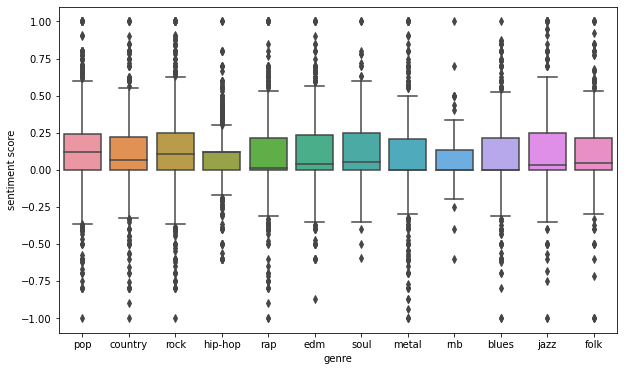

In [8]:
# For sentiment and sentiment score analysis, prefer median. 
plt.figure(figsize=(10, 6))
sns.boxplot(data=genre_df, x='genre', y='sentiment score')

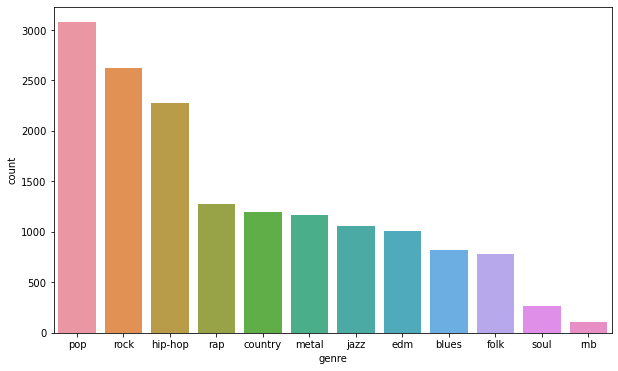

In [9]:
# For popularity analysis, use either mean or median.
plt.figure(figsize=(10, 6))
sns.countplot(data=genre_df,x='genre',order=genre_df['genre'].value_counts().index)
plt.show()

<AxesSubplot:xlabel='genre', ylabel='count'>

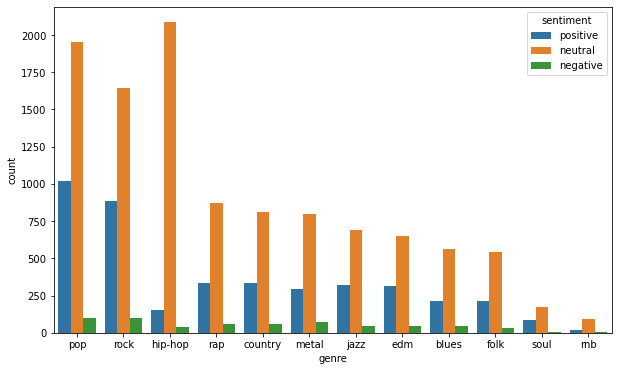

In [10]:
# Hip-hop has high amount of neutral comments 
plt.figure(figsize=(10, 6))
sns.countplot(data=genre_df,x='genre',hue='sentiment',order=genre_df['genre'].value_counts().index)

In [11]:
df_positive = genre_df[genre_df['sentiment']=='positive']
df_neutral = genre_df[genre_df['sentiment']=='neutral']
df_negative = genre_df[genre_df['sentiment']=='negative']

In [12]:
df_positive_proportions = df_positive.groupby(['genre']).count()
df_positive_proportions = round(df_positive_proportions.div(df_positive_proportions.sum())*100,2)
df_positive_proportions = df_positive_proportions.rename(columns={'sentiment score':'proportion'})
df_positive_proportions= pd.DataFrame(df_positive_proportions).reset_index().sort_values(by='proportion', ascending=False)

df_neutral_proportions = df_neutral.groupby(['genre']).count()
df_neutral_proportions = round(df_neutral_proportions.div(df_neutral_proportions.sum())*100,2)
df_neutral_proportions=df_neutral_proportions.rename(columns={'sentiment score':'proportion'})
df_neutral_proportions= pd.DataFrame(df_neutral_proportions).reset_index().sort_values(by='proportion', ascending=False)

df_negative_proportions = df_negative.groupby(['genre']).count()
df_negative_proportions = round(df_negative_proportions.div(df_negative_proportions.sum())*100,2)
df_negative_proportions=df_negative_proportions.rename(columns={'sentiment score':'proportion'})
df_negative_proportions= pd.DataFrame(df_negative_proportions).reset_index().sort_values(by='proportion', ascending=False)

In [13]:
df_positive_proportions.sort_values(by='proportion',ascending=False)[['genre','proportion']]

,genre,proportion
7,pop,24.41
10,rock,21.16
8,rap,8.01
1,country,7.94
5,jazz,7.75
2,edm,7.48
6,metal,7.01
0,blues,5.14
3,folk,5.07
4,hip-hop,3.66


<AxesSubplot:xlabel='proportion', ylabel='genre'>

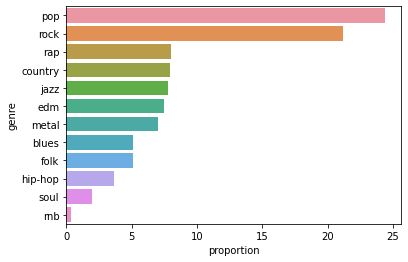

In [14]:
sns.barplot(data=df_positive_proportions, x='proportion', y='genre', orient='h')

In [15]:
df_neutral_proportions.sort_values(by='proportion',ascending=False)[['genre','proportion']]

,genre,proportion
4,hip-hop,19.19
7,pop,17.99
10,rock,15.10
8,rap,8.05
1,country,7.44
6,metal,7.31
5,jazz,6.36
2,edm,6.01
0,blues,5.15
3,folk,4.98


<AxesSubplot:xlabel='proportion', ylabel='genre'>

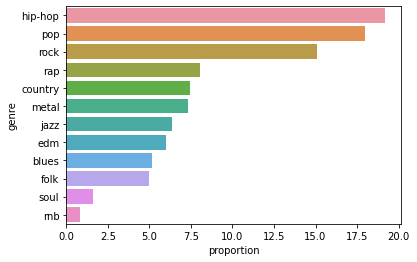

In [16]:
sns.barplot(data=df_neutral_proportions, x='proportion', y='genre', orient='h')

In [17]:
df_negative_proportions.sort_values(by='proportion',ascending=False)[['genre','proportion']]

,genre,proportion
7,pop,16.31
10,rock,15.99
6,metal,12.07
8,rap,10.11
1,country,9.62
0,blues,7.67
2,edm,7.34
5,jazz,7.34
4,hip-hop,6.69
3,folk,5.22


<AxesSubplot:xlabel='proportion', ylabel='genre'>

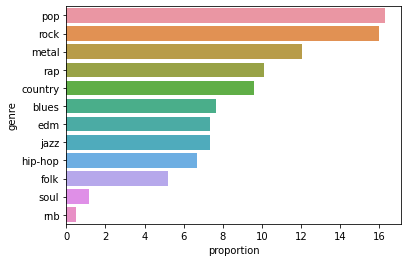

In [18]:
sns.barplot(data=df_negative_proportions, x='proportion', y='genre', orient='h')

# Correlation Analysis

In [19]:
# Hypothesis: Does higher popularity equate to higher positive and negative sentiment?

In [20]:
genre_neg_corr = genre_df[genre_df['sentiment']=='negative']
genre_neg_corr = genre_neg_corr.groupby(['genre']).median()['sentiment score']

In [21]:
genre_neut_corr = genre_df[genre_df['sentiment']=='neutral']
genre_neut_corr = genre_neut_corr.groupby(['genre']).median()['sentiment score']

In [22]:
genre_pos_corr = genre_df[genre_df['sentiment']=='positive']
genre_pos_corr = genre_pos_corr.groupby(['genre']).median()['sentiment score']

In [23]:
genre_count_corr = genre_df.value_counts('genre').sort_index()

In [24]:
genre_neg_corr = pd.Series(genre_neg_corr,
                       index=['blues', 'country', 'edm', 'folk', 'hip-hop', 'jazz', 'metal', 'pop', 'rap', 'rnb', 'rock', 'soul'],
                       name='Median Negative Sentiment Score')

genre_neut_corr = pd.Series(genre_neut_corr,
                       index=['blues', 'country', 'edm', 'folk', 'hip-hop', 'jazz', 'metal', 'pop', 'rap', 'rnb', 'rock', 'soul'],
                       name='Median Neutral Sentiment Score')

genre_pos_corr = pd.Series(genre_pos_corr,
                       index=['blues', 'country', 'edm', 'folk', 'hip-hop', 'jazz', 'metal', 'pop', 'rap', 'rnb', 'rock', 'soul'],
                       name='Median Positive Sentiment Score')

genre_count_corr = pd.Series(genre_count_corr,
                       index=['blues', 'country', 'edm', 'folk', 'hip-hop', 'jazz', 'metal', 'pop', 'rap', 'rnb', 'rock', 'soul'],
                       name='Popularity')

genre_df_corr = pd.concat([genre_count_corr,genre_neg_corr,genre_neut_corr,genre_pos_corr], axis=1)


In [25]:
genre_df_corr

,Popularity,Median Negative Sentiment Score,Median Neutral Sentiment Score,Median Positive Sentiment Score
blues,822,-0.431818,0.000000,0.375000
country,1200,-0.450000,0.000000,0.343259
edm,1011,-0.390625,0.000000,0.325000
folk,785,-0.300000,0.000000,0.350000
hip-hop,2280,-0.500000,0.120000,0.358333
jazz,1060,-0.300000,0.000000,0.375000
metal,1162,-0.379167,0.000000,0.340000
pop,3077,-0.312500,0.033333,0.303030
rap,1272,-0.341667,0.000000,0.333333
rnb,109,-0.400000,0.000000,0.416667


<AxesSubplot:>

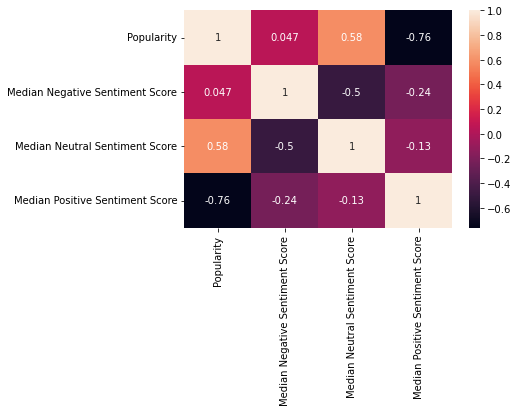

In [26]:
# Impacts to popularity: Negative little impact, Neutral high positive, Positive low negative. 
sns.heatmap(genre_df_corr.corr(),annot=True)

<AxesSubplot:xlabel='Popularity', ylabel='Median Negative Sentiment Score'>

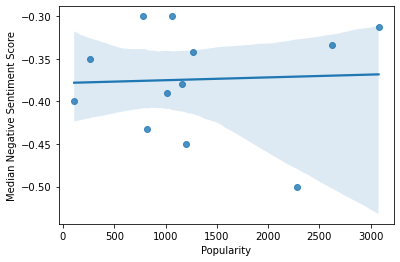

In [27]:
sns.regplot(data=genre_df_corr,x='Popularity',y='Median Negative Sentiment Score')

<AxesSubplot:xlabel='Popularity', ylabel='Median Neutral Sentiment Score'>

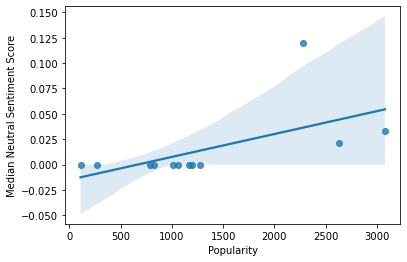

In [28]:
sns.regplot(data=genre_df_corr,x='Popularity',y='Median Neutral Sentiment Score')

<AxesSubplot:xlabel='Popularity', ylabel='Median Positive Sentiment Score'>

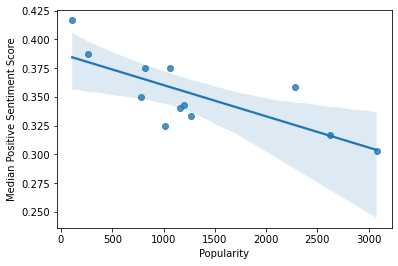

In [29]:
sns.regplot(data=genre_df_corr,x='Popularity',y='Median Positive Sentiment Score')

# Polarity Score Analysis

In [30]:
genre_sentiment_counts = genre_df.groupby(['genre', 'sentiment'])['sentiment'].count().unstack()

In [31]:
genre_sentiment_counts['total'] = genre_sentiment_counts['positive']+ genre_sentiment_counts['negative'] + genre_sentiment_counts['neutral']

In [32]:
genre_sentiment_counts['polarity_score'] = \
    (genre_sentiment_counts['positive'] - genre_sentiment_counts['negative'])/genre_sentiment_counts['total']

In [33]:
genre_sentiment_counts['polarity_score'].sort_values(ascending=False)

genre
rock       0.299810
pop        0.299318
soul       0.286792
edm        0.265084
jazz       0.263208
folk       0.229299
country    0.227500
rap        0.214623
blues      0.204380
metal      0.188468
rnb        0.119266
hip-hop    0.049123
Name: polarity_score, dtype: float64

In [34]:
genre_pol_corr = genre_sentiment_counts['polarity_score'].sort_index()

In [35]:
genre_pol_corr = pd.Series(genre_pol_corr,
                       index=['blues', 'country', 'edm', 'folk', 'hip-hop', 'jazz', 'metal', 'pop', 'rap', 'rnb', 'rock', 'soul'],
                       name='Polarity Score')

genre_df_pol_corr = pd.concat([genre_count_corr,genre_pol_corr], axis=1)

In [36]:
genre_df_pol_corr.corr()

,Popularity,Polarity Score
Popularity,1.000000,0.151411
Polarity Score,0.151411,1.000000


# Group Dynamics Analysis

In [37]:
genre_df_2022 = genre_df[genre_df['year']==2022]
genre_df_2023 = genre_df[genre_df['year']==2023]

genre_df_2022_no_neutral = genre_df_2022[(genre_df_2022['sentiment']=='positive') | (genre_df_2022['sentiment']=='negative')]
genre_df_2023_no_neutral = genre_df_2023[(genre_df_2023['sentiment']=='positive') | (genre_df_2023['sentiment']=='negative')]

In [38]:
order_genres = sorted(genre_df_2023_no_neutral['genre'].unique())

[Text(0, 0, '27'),
 Text(0, 0, '23'),
 Text(0, 0, '17'),
 Text(0, 0, '13'),
 Text(0, 0, '24'),
 Text(0, 0, '27'),
 Text(0, 0, '34'),
 Text(0, 0, '44'),
 Text(0, 0, '29'),
 Text(0, 0, '1'),
 Text(0, 0, '49'),
 Text(0, 0, '4')]

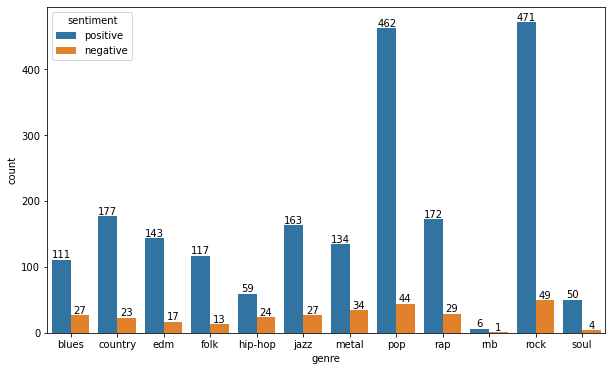

In [39]:
# Analysis of 2022
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=genre_df_2022_no_neutral,x='genre',hue='sentiment', order=order_genres)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

[Text(0, 0, '20'),
 Text(0, 0, '36'),
 Text(0, 0, '28'),
 Text(0, 0, '19'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '40'),
 Text(0, 0, '56'),
 Text(0, 0, '33'),
 Text(0, 0, '2'),
 Text(0, 0, '49'),
 Text(0, 0, '3')]

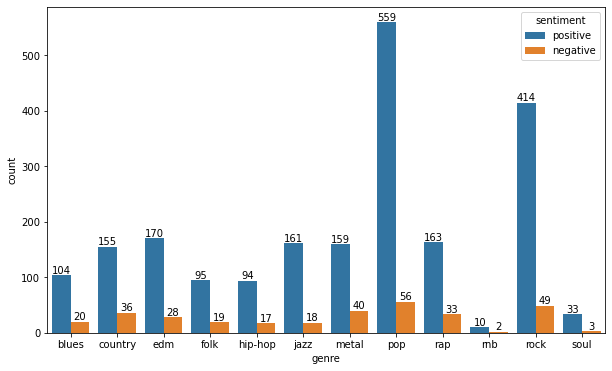

In [40]:
# Analysis of 2023
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=genre_df_2023_no_neutral,x='genre',hue='sentiment',order=order_genres)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [41]:
genre_diff = pd.DataFrame\
((genre_df_2023.groupby(['genre']).count() - genre_df_2022.groupby(['genre']).count())['sentiment']).reset_index()
genre_diff = genre_diff.rename(columns={'sentiment':'group change'}).sort_values(by='group change',ascending=False)

In [42]:
genre_diff

,genre,group change
7,pop,81
6,metal,66
2,edm,39
9,rnb,21
4,hip-hop,16
5,jazz,4
1,country,2
8,rap,-18
10,rock,-25
3,folk,-35


<AxesSubplot:xlabel='group change', ylabel='genre'>

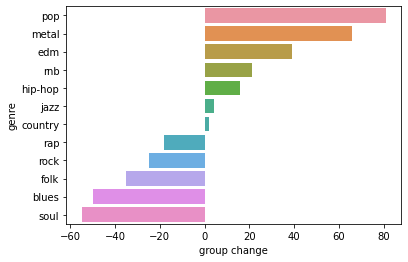

In [43]:
sns.barplot(data=genre_diff, x='group change', y='genre', orient='h')